### 캔들차트
<img src="img/candle.jpg"/>
<img src="img/candle2.png"/>

- 봉 차트를 구성하는 기본 단위인 ‘일봉’은 거래일 동안의 시가(장시작 가격), 고가(장중 최고가), 저가(장중 최저가), 종가(장마감 가격)의 네 가지 값을 한 개의 봉으로 표현
- 양봉 : 일봉 중 종가가 시가보다 높은 경우
- 음봉 : 종가가 시가보다 낮은 경우
    - ex) 종가와 고가 사이의 간격이 크다는 것은 하루 중에 주가가 크게 올랐다가 결국은 다시 떨어지는 것을 의미.
    - ex) 비슷하게 종가와 저가 사이의 간격이 크다는 것은 장중에 주가가 크게 떨어졌다가 장 종료 시점에는 일정 부분 상승한 채로 장이 종료됐음을 의미
- 많은 투자 관련 책에서 봉 차트를 바탕으로 주가가 약세시점에서 양봉 3개가 나타나는 것을 ‘적삼병’이라고 부르고 이를 주가 상승 장세의 시점으로 판단
- 반대로 주가가 상승 시점에 있다가 음봉 3개가 연달아서 나타나면 이를 ‘흑삼병’이라고 부르고 주가가 하락세로 전환되거나 하락세가 지속될 시점으로 판단

## 캔들 차트 그리기

In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [53]:
def seldata(cols=['sday','sopen','shigh','slow','sclose','svol'],where='where sday>"2022-04-01" order by sday asc'):
    fname='_db/nstock.db'
    with sqlite3.connect(fname) as conn:
        cur=conn.cursor()
        coltxt=','.join(cols)
        sql='select '+coltxt+' from stockdb '+where
        print(sql)
        res=cur.execute(sql).fetchall()
    return res

res=seldata()    
res[:5]

select sday,sopen,shigh,slow,sclose,svol from stockdb where sday>"2022-04-01" order by sday asc


[('2022-04-04', 115000, 117500, 114500, 117000, 2470792),
 ('2022-04-05', 117500, 118000, 116000, 116500, 2101474),
 ('2022-04-06', 114500, 115500, 113000, 113000, 4541938),
 ('2022-04-07', 111500, 114500, 110500, 113500, 5027865),
 ('2022-04-08', 113000, 114000, 110500, 112000, 4268316)]

In [55]:
cols=['sday','sopen','shigh','slow','sclose','svol']
df = pd.DataFrame(res,columns=cols)
df.tail()

,sday,sopen,shigh,slow,sclose,svol
23,2022-05-06,108000,108500,106500,107500,2566813
24,2022-05-09,107000,109000,106500,107500,2203472
25,2022-05-10,107000,111000,107000,110000,4141923
26,2022-05-11,110500,112500,108000,110500,3658168
27,2022-05-12,109500,111500,108500,110500,1938788


# mpl_finance 캔들 차트를 그리기 위한 라이브러리

In [12]:
!pip install mpl_finance

In [13]:
from mpl_finance import candlestick_ohlc

C:\Users\totqu\anaconda3\envs\py38\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [56]:
cdf=df.set_index('sday')
cdf.tail()

,sopen,shigh,slow,sclose,svol
sday,,,,,
2022-05-06,108000,108500,106500,107500,2566813
2022-05-09,107000,109000,106500,107500,2203472
2022-05-10,107000,111000,107000,110000,4141923
2022-05-11,110500,112500,108000,110500,3658168
2022-05-12,109500,111500,108500,110500,1938788


In [57]:
idx=np.arange(len(cdf))

In [58]:
idxs=np.reshape(idx,(-1,1))
idxs.shape

(28, 1)

In [64]:
cdf['svol'].values

array([2470792, 2101474, 4541938, 5027865, 4268316, 2390786, 2738163,
       2484490, 4715700, 3694012, 2670439, 3021192, 2905007, 3199858,
       2360834, 2282343, 2969516, 3261290, 2804966, 3752415, 2175384,
       2676115, 2491890, 2566813, 2203472, 4141923, 3658168, 1938788],
      dtype=int64)

In [61]:
# 캔들 스틱용 자료 만들기
ohlc=cdf[['sopen','shigh','slow','sclose']].values
candleohlc=np.hstack((idxs,ohlc))
candleohlc[:5]

array([[     0, 115000, 117500, 114500, 117000],
       [     1, 117500, 118000, 116000, 116500],
       [     2, 114500, 115500, 113000, 113000],
       [     3, 111500, 114500, 110500, 113500],
       [     4, 113000, 114000, 110500, 112000]], dtype=int64)

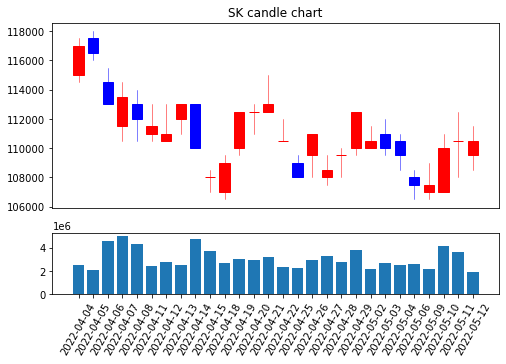

In [77]:
from matplotlib.gridspec import GridSpec

fig=plt.figure(figsize=(8,5))
gs= GridSpec(nrows=2,
             ncols=1,
             height_ratios=[3,1])
ax1=fig.add_subplot(gs[0,0])
ax1.get_xaxis().set_visible(False)
ax2=fig.add_subplot(gs[1,0],sharex=ax1)
candlestick_ohlc(ax1,candleohlc,
                 colordown='b',
                 colorup='r',
                 width=0.7
                )
ax2.bar(cdf.index,cdf['svol'].values)
plt.xticks(rotation=60)
ax1.set_title('SK candle chart')
plt.show()

# 잠성전자 주가로 캔들차트 그리기

In [4]:
import tensorflow as tf
from pykrx import stock

In [5]:
# 삼성전자
stock_name = stock.get_market_ticker_name("005930")
stock_name

'삼성전자'

In [24]:
# 삼성전자의 20220701~20221015 주가데이터
samsung = stock.get_market_ohlcv_by_date(fromdate="20220101", todate="20220630", ticker="005930")
samsung.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2022-01-03,79400,79800,78200,78600,13502112
2022-01-04,78800,79200,78300,78700,12427416
2022-01-05,78800,79000,76400,77400,25470640
2022-01-06,76700,77600,76600,76900,12931954
2022-01-07,78100,78400,77400,78300,15163757


In [25]:
from mpl_finance import candlestick_ohlc

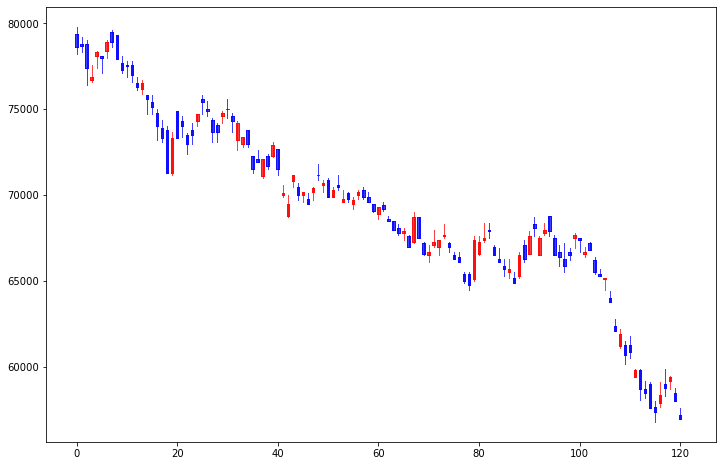

In [26]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, samsung['시가'], samsung['고가'], samsung['저가'], samsung['종가'], 
                             width=0.5, colorup='r', colordown='b')
plt.show()